Week 2 Challenge: A/B Hypothesis Testing: Ad campaign performance 

  Objective:

The main objective of this project is to test if the ads that the advertising company runs resulted in a significant lift in brand awareness. 

In [84]:
# importing Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import scipy
from scipy import stats


In [78]:
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
pd.set_option('display.float_format',lambda x:'%5f'%x)
db = pd.read_csv('../Data/AdSmartABdata.csv')

 Data Understanding

In [79]:
db.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [61]:
# size of the data
db.size

72693

In [62]:
db.shape

(8077, 9)

In [64]:
# data type of the data frame
db.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [65]:
db['date'] = pd.to_datetime(db['date'])

Task 1.2 Classic and sequential A/B testing analysis

In [66]:
# Data exploration
# printing number of unique values and unique values
print('The number of unique devices: ', db['device_make'].nunique())
print('Unique Browsers: ', db['browser'].unique())
print('platform_os: ', db['platform_os'].unique())


The number of unique devices:  270
Unique Browsers:  ['Chrome Mobile' 'Chrome Mobile WebView' 'Facebook' 'Mobile Safari'
 'Chrome Mobile iOS' 'Samsung Internet' 'Mobile Safari UI/WKWebView'
 'Chrome' 'Opera Mini' 'Edge Mobile' 'Android' 'Pinterest' 'Opera Mobile'
 'Firefox Mobile' 'Puffin']
platform_os:  [6 5 7]


In [67]:
# checking if missing values are there
db.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [112]:
#Histogram
def plot_hist(df,col1):
    plt.figure(figsize=(10,8))
    plt.hist(df[col1],bins=20,color='#B0C485',edgecolor='#64894B',linewidth=0.5)
    plt.title(f'Histogram of {col1}', size=16,fontweight='bold')
    plt.show()
#Scatter plot
def plot_scatter(df,col1,col2):
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=col1, y=col2, hue=col1, style=col1)
    plt.title(f'{col1} vs {col2}', size=16)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()
    
def plot_count(df,col1):
    plt.figure(figsize=(14,5))
    
    sns.countplot(data=df, x=col1,palette='summer')
    plt.title(f'Distribution of {col1}', size=16, fontweight='bold')
    plt.xticks(rotation=90)
def plot_count_two(df,col1,col2):
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    sns.countplot(data=df, x=col1,palette='summer')
    plt.title(f'Distribution of {col1}', size=16, fontweight='bold')
    plt.xticks(rotation=70)
    
    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col2,palette='summer_r')
    plt.title(f'Distribution of {col2}', size=16, fontweight='bold')
    plt.xticks(rotation=70)
    plt.show()
    

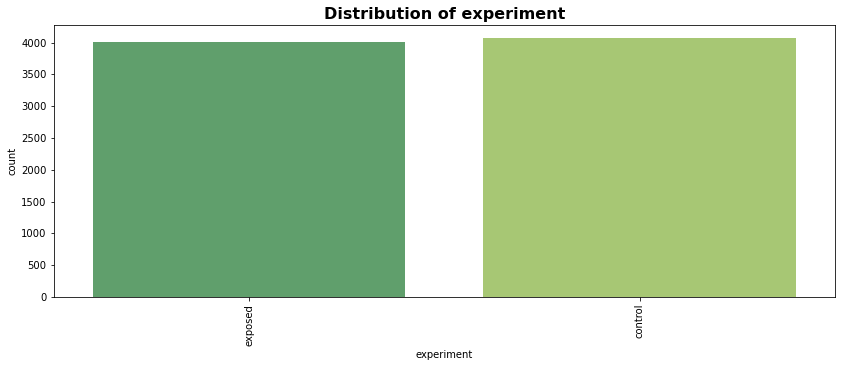

In [115]:
# plotting the experiment column
plot_count(db,'experiment')

**As we can see from the figure the online users are equally distributed to the exposed and control groups.**  

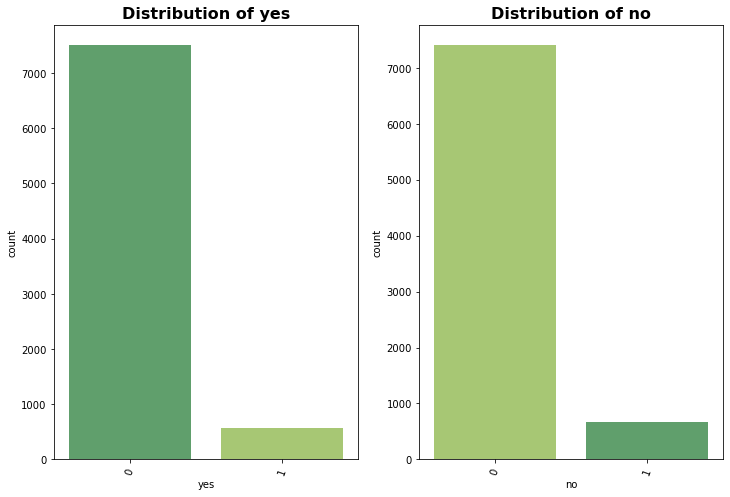

In [116]:
# plotting the yes and no column
plot_count_two(db,'yes','no')

**As we can see from the figure most of the users did not answer the questions.**

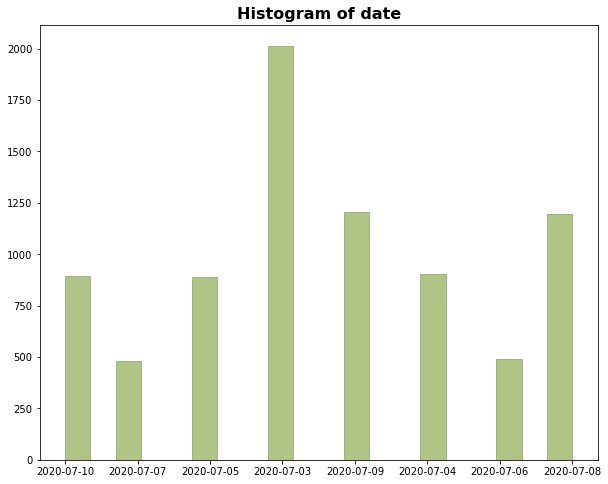

In [118]:
plot_hist(db,'date')

**As we can see from the figure most of the users filled the question at the first day.**

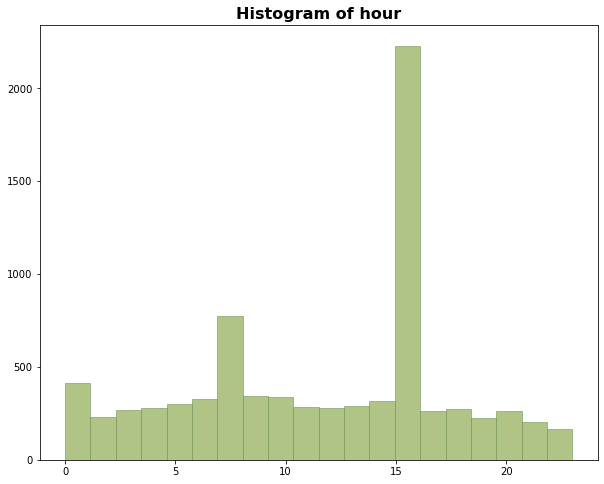

In [120]:
plot_hist(db,'hour')

**Most of the users filled the form around 12pm UTc**